Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [100]:
NAME = "Bartłomiej Gintowt"

---

# Wprowadzenie do programowania probabilistycznego

W tym notebooku zawarte są zadania wprowadzające do rachunku prawdopodobieństwa i statystyki w środowisku python oraz programowania probabilistycznego.


## Rachunek prawdopodobieństwa

Rachunek prawdopodobieństwa, czyli dział matematyki zajmujący się niepewnością i losowością, stanowi podstawę rozpoznawania wzorców. Umożliwia on ujęcie ilościowe niepewności wynikającej np. z szumów występujących w danych lub też ograniczonej ich ilości, dzięki czemu możemy wykonywać predykcje na podstawie danych, które są niekompletne lub niejednoznaczne.

W zadaniu będziemy posługiwać się przykładem. Wyobraźmy sobie dwa pudełka: jedno czerwone i jedno niebieskie. Czerwone pudełko zawiera w sobie 4 jabłka i 6 pomarańczy, natomiast niebieskie zawiera 7 jabłek i 3 pomarańcze. Załóżmy, że:

* losowo wybieramy jedno z pudełek i z tego pudełka losowo wybieramy owoc, a po zaobserwowaniu co to za owoc, zwracamy go do pudełka
* czerwone pudełko wybieramy 30% razy, a niebieskie 70% razy
* szansa na wybór każdego z owoców jest taka sama

W tym przykładzie, wybór pudełka jest **zmienną losową**; oznaczmy ją jako $B$. Zmienna ta może przyjmować dwie wartości: $B=r$ (czerwone pudełko) albo $B=b$ (niebieskie pudełko). Analogicznie, wybór owocu jest również zmienną losową; oznaczmy ją jako $F$ - wówczas $F=a$ oznacza wybór jabłka, a $F=o$ oznacza wybór pomarańczy.

Prawdopodobieństwo wyboru czerwonego pudełka wynosi $\Pr(B=r) = 0.3$, natomiast prawdopodobieństwo wyboru niebieskiego pudełka to $\Pr(B=b) = 0.7$. Są to zdarzenia rozłączne oraz obejmują wszystkie możliwe wyniki, zatem suma prawdopodobieństw ich wystąpienia wynosi $\Pr(B=r) + \Pr(B=b) = 1$.


### Zadanie 1.1a (0,25 p.)

Załóżmy, że powtarzamy powyższy schemat czterokrotnie w celu wylosowania czterech owoców (kolejność nie jest istotna). Podaj przestrzeń zdarzeń elementarnych dla doświadczenia losowego. Zapisz ją w formie listy krotek odpowiednich znaków (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_1`.


In [101]:
space_1 = []
owoce = ["a", "o"]
for owoc1 in owoce:
    for owoc2 in owoce:
        for owoc3 in owoce:
            for owoc4 in owoce:
                space_1.append((owoc1, owoc2, owoc3, owoc4))
#raise NotImplementedError()

In [102]:
assert type(space_1) == list
for sample in space_1:
    assert type(sample) == tuple
    assert len(sample) == 4
    for item in sample:
        assert type(item) == str
        assert len(item) == 1
        assert item in {"a", "o", "b", "r"}

        

### Zadanie 1.1b (0,25 p.)

Drugie z doświadczeń polega na wylosowaniu pary ${B, F}$: najpierw losujemy pudełko, a następnie losujemy z niego owoc. Podaj przestrzeń zdarzeń dla tak zdefiniowanego doświadczenia losowego. Zapisz je w postaci listy krotek (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_2`.


In [103]:
space_2 = []
for pudelko in ["r", "b"]:
    for owoc in ["a", "o"]:
        space_2.append((pudelko, owoc))
#raise NotImplementedError()


In [104]:
assert type(space_2) == list
for sample in space_2:
    assert type(sample) == tuple
    assert len(sample) == 2
    assert sample[0] in {"r", "b"}
    assert sample[1] in {"a", "o"}
    assert all(type(item) == str for item in sample)



Uogólniając powyższy przykład, rozważmy dwie zmienne losowe $X$ i $Y$. Zmienna $X$ może przyjąć dowolną wartość $x \in \{x_1, x_2, \ldots, x_M\}$, a zmienna $Y$ może przyjąć wartości $y \in \{y_i, y_2, \ldots, y_L\}$. Rozważmy, że $N$ razy próbkujemy wartości obu zmiennych $X$ i $Y$; liczba prób, w których $X=x_i$ i $Y=y_j$ wynosi $n_{ij}$. Ponadto, załózmy, że liczba przypadków, gdzie $X$ przyjmuje wartość $x_i$ (bez względu na wartość $Y$) to $c_i$; analogicznie liczba prób, gdy $Y=y_j$ oznaczamy przez $r_j$.

**Prawdopodobieństwo łączne**, tzn. prawdopodobieństwo, że zmienna $X$ przyjmie wartość $x_i$ oraz że $Y$ przyjmie wartość $y_j$ definiuje się jako:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N}\tag{1}$$

Implicite rozważamy tu granicę przy $N\rightarrow\infty$. Analogicznie, **prawdopodobieństwo brzegowe**, tzn. prawdopodobieństwo, że $X$ przyjmuje wartość $x_i$ bez względu na wartość $Y$ można zapisać jako:

$$\Pr(X=x_i) = \frac{c_i}{N}\tag{2}$$


### Zadanie 1.2 (0,25 p.)

W doświadczeniu losowym z pudełkami i owocami, rozpisz liczby wystąpień każdego z przypadków w tablicy dwudzielczej, które dadzą określone wcześniej prawdopodobieństwa, przekształcając powyższe wzory i przypisując odpowiednie wartości do zmiennych zadeklarowanych w tablicy. Tablica dwudzielcza to tabela przedstawiająca łączny rozkład dwóch zmiennych: każda komórka zawiera liczbę wystąpień kombinacji wartości zmiennych. Załóż, że wykonano $N=100$ prób.

| B / F  |            B=r |            B=b |                      |
| ------ | -------------- | -------------- | -------------------- |
|    F=a |         `n_ra` |         `n_ba` |       $$\sum_B=r_a$$ | 
|    F=o |         `n_ro` |         `n_bo` |       $$\sum_B=r_o$$ |
|        | $$\sum_F=c_r$$ | $$\sum_F=c_b$$ | $$\sum_B\sum_F = N$$ |


In [105]:
p_r = 0.3
p_b = 0.7

n_ra = p_r*4/10*100
n_ba = p_b*7/10*100
n_ro = p_r*6/10*100
n_bo = p_b*3/10*100

import pandas as pd
df = pd.DataFrame([[n_ra, n_ba], [n_ro, n_bo]])
df.columns = ['B=r', 'B=b']
df.index = ['F=a', 'F=o']
df['Suma_wierszów'] = df.sum(axis=1)
df.loc['Suma_kolumn'] = df.sum()
df = df.astype(int)
df
#raise NotImplementedError()


B=r  B=b  Suma_wierszów
F=a           12   48             60
F=o           18   20             39
Suma_kolumn   30   69            100

In [106]:
assert n_ra + n_ro + n_ba + n_bo == 100


Marginalizacja polega na przejściu z rozkładu łącznego na rozkład brzegowy. Patrząc na tablicę dwudzielną, polega ona na zsumowaniu liczby wystąpień w wierszach albo kolumnach i podzieleniu przez całkowitą liczbę próbek (**reguła brzegowa**).

$$\Pr(X=x_i) = \sum_{j=1}^L \Pr(X=x_i, Y=y_j)\tag{3}$$

Jeżeli rozważymy przykłady, dla których $X=x_i$, wówczas część spośród nich, dla których $Y=y_j$ określa się mianem **prawdopodbieństwa warunkowego**:

$$\Pr(Y=y_j \mid X=x_i) = \frac{n_{ij}}{c_i}\tag{4}$$

Stąd też wynika zależność - **reguła łańcuchowa**:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \frac{c_i}{N} = \Pr(Y=y_j \mid X=x_i)\Pr(X=x_i)\tag{5}$$


### Zadanie 1.3 (0,25 p.)

Oblicz wartości prawdopodobieństwa warunkowego dla wcześniejszego doświadczenia losowego:

|      prawdopodobieństwo      |  zmienna  |
| ---------------------------- | --------- |
|        $$\Pr(F=a \mid B=r)$$ | `p_fa_br` |
|        $$\Pr(F=o \mid B=r)$$ | `p_fo_br` |
|        $$\Pr(F=a \mid B=b)$$ | `p_fa_bb` |
|        $$\Pr(F=o \mid B=b)$$ | `p_fo_bb` |
|        $$\Pr(B=r \mid F=a)$$ | `p_br_fa` |
|        $$\Pr(B=b \mid F=a)$$ | `p_bb_fa` |
|        $$\Pr(B=r \mid F=o)$$ | `p_br_fo` |
|        $$\Pr(B=b \mid F=o)$$ | `p_bb_fo` |


In [107]:
p_fa_br = df.iloc[0, 0]/df.iloc[2, 0]
p_fo_br = df.iloc[1, 0]/df.iloc[2, 0]
p_fa_bb = df.iloc[0, 1]/df.iloc[2, 1]
p_fo_bb = df.iloc[1, 1]/df.iloc[2, 1]
p_br_fa = df.iloc[0, 0]/df.iloc[0, 2]
p_bb_fa = df.iloc[0, 1]/df.iloc[0, 2]
p_br_fo = df.iloc[1, 0]/df.iloc[1, 2]
p_bb_fo = df.iloc[1, 1]/df.iloc[1, 2]
#raise NotImplementedError()


In [108]:
# testy ukryte


Przekształcając równanie reguły łańcuchowej $(5)$ oraz reguły brzegowej $(3)$ oraz wykorzystując właściwość, że $\Pr(X, Y) = \Pr(Y, X)$, uzyskujemy zależność pomiędzy prawdopodobieństwami warunkowymi:

$$\Pr(Y \mid X) = \frac{\Pr(X \mid Y) \Pr(Y)}{\Pr(X)}\tag{6}$$

Zależność ta nazywana jest **regułą Bayesa** i pełni ona centralną rolę w probabilistycznym uczeniu maszynowym. Wykorzystując ponownie regułę brzegową $(3)$, mianownik równania $(6)$ można przedstawić w postaci:

$$\Pr(X) = \sum_Y \Pr(X \mid Y) \Pr(Y)\tag{7}$$

Można go zatem potraktować jako "stałą normalizującą", gwarantującą, że prawdopodobieństwo warunkowe $\Pr(Y \mid X)$ sumuje się do $1$.


### Zadanie 1.4 (0,5 p.)

Test diagnostyczny dotyczący pewnej choroby ma następujące parametry:

* jeżeli pacjent jest chory ($Y=1$), to prawdopodobieństwo, że test diagnostyczny dał wynik pozytywny ($X=1$) wynosi $0.9$ (*czułość testu* - stosunek wyników prawdziwie dodatnich do sumy prawdziwie dodatnich i fałszywie ujemnych)
* prawdopodobieństwo że osoba jest chora na tę chorobę ($Y=1$) wynosi $0.014$
* jeżeli pacjent nie jest chory ($Y=0$), to prawdopodobieństwo, że test dał wynik negatywny ($X=0$) wynosi $0.97$ (*swoistość testu* - stosunek wyników prawdziwie ujemnych od sumy prawdziwie ujemnych i fałszywie dodatnich)

1. Zapisz te prawdopodobieństwa używając notacji matematycznej
1. Wyprowadź równania potrzebne do obliczenia prawdopodobieństwa, że pacjent jest chory, jeżeli test wyszedł pozytywny; oblicz to prawdopodobieństwo

Zapisz wynik w zmiennej `p_y1_x1`.


$$ P(X=1 \mid Y=1) = 0.9 $$
$$ P(Y=1) = 0.014 $$
$$ P(X=0 \mid Y=0) = 0.97 $$
$$ P(Y=1 \mid X=1) = \frac{P(X=1 \mid Y=1)P(Y=1)}{P(X=1)} = \frac{P(X=1 \mid Y=1)P(Y=1)}{ \sum_Y P(X=1 \mid Y)P(Y) } = \frac{P(X=1 \mid Y=1)P(Y=1)}{ P(X=1 \mid Y=0)P(Y=0) + P(X=1 \mid Y=1)P(Y=1) } =$$
$$ =\frac{P(X=1 \mid Y=1)P(Y=1)}{ (1-P(X=0 \mid Y=0))(1-P(Y=1)) + P(X=1 \mid Y=1)P(Y=1) } $$

In [109]:
p_y1_x1 = (0.9*0.014) / ((1-0.97)*(1-0.014) + 0.9*0.014)
#raise NotImplementedError()

In [110]:
# testy ukryte


### Rozkłady prawdopodobieństwa

Oprócz opisywanych wcześniej zmiennych losowych dyskretnych, prawdopodobieństwa mogą dotyczyć również zmiennych ciągłych. Rozkład prawdopodobieństa zmiennych ciągłych opisany jest **funkcją gęstości** $p(x)$. Prawdopodobieństwo, że zmienna losowa $X$ przyjmuje wartości z przedziału $[a, b]$ można wyznaczyć przy pomocy równania:

$$\Pr(a \le X \le b) = \int_a^b p(x) dx\tag{8}$$

Funkcja gęstości spełnia dwa kryteria:
* $p(x) \ge 0$ - prawdopodobieństwo jest nieujemne,
* $\int_{-\infty}^{\infty} p(x) dx = 1$ - całkowite prawdopodobieństwo jest równe $1$.


**Dystrybuantą**, czyli funkcją skumulowanej gęstości prawdopodobieństwa nazywamy prawdopodobieństwo, że $x$ leży w przedziale $(-\infty, z)$:

$$F(z) = \int_{-\infty}^z p(x) dx\tag{9}$$

Dla zmiennych dyskretnych funkcja $p(x)$ jest nazywana **funkcją masy prawdopodobieństwa**.

Załóżmy, że $x$ i $y$ są dwoma zmiennymi ciągłymi. Funkcja gęstości spełnia reguły:

* brzegową: $p(x) = \int p(x, y) dy$
* łańcuchową: $p(x, y) = p(x \mid y)p(y)$
* Bayesa: $p(y \mid x) = \frac{p(x \mid y) p(y)}{p(x)}$

#### Własności rozkładu prawdopodobieństwa

Podstawową własnością rozkładu jest **wartość oczekiwana**, określająca spodziewany wynik doświadczenia losowego. Dla rozkładu dyskretnego dany jest wzorem:

$$\mathbb{E}[X] = \sum_{x\in\mathcal{X}} x \cdot p(x)\tag{10}$$

natomiast dla rozkładu ciągłego definiuje się:

$$\mathbb{E}[X] = \int_{x\in\mathcal{X}} x \cdot p(x) dx\tag{11}$$

**Wariancja** to własność określająca jak bardzo wartości $x$ odchylają się od średniej (*rozpiętość rozkładu*)

$$Var[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2\tag{12}$$

**Odchylenie standardowe** definiowane jest jako pierwiastek z wariancji:

$$std[X] = \sqrt{Var[X]}\tag{13}$$

Dla dwóch zmiennych losowych $X$ i $Y$, **kowariancja** określa stopień, w jakim zależą od siebie liniowo. Dana jest ona wzorem:

$$cov[X, Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] \in [0, \infty)\tag{14}$$

**Korelacja** jest znormalizowana postacią kowariancji:

$$corr[X, Y] = \frac{cov[X, Y]}{\sqrt{Var[X]Var[Y]}} \in [-1, 1]\tag{15}$$

Dla liniowo zależnych zmiennych losowych $X$ i $Y$ $|corr[X, Y]| = 1$. Gdy zmienne są od siebie niezależne, tzn. $\Pr(X,Y) = \Pr(X)\Pr(Y)$, wtedy $corr[X, Y] = 0$.


## Pyro

[**Pyro**](https://pyro.ai) to probabilistyczny język programowania udostępniony przez Uber AI Labs. Zbudowany jest on na frameworku PyTorch, łącząc modelowanie modeli głębokich z modelowaniem bayesowskim.

Probabilistyczny język programowania to język zaprojektowany do budowy oraz wnioskowania w modelach probabilistycznych. Zagadnienie to będzie omawiane w ramach kolejnych laboratoriów - tutaj skupimy się na podstawowych prymitywach Pyro.

Podobnie jak PyTorch, Pyro pozwala na wykorzystanie dowolnych instrukcji Pythona, takich jak pętle, rekursja, funkcje wysokopoziomowe itp., dzięki czemu można w nim zareprezentować dowolny obliczalny rozkład prawdopodobieństwa.

Podstawowym elementem programów probabilistycznych są *funkcje stochastyczne*. W Pyro są to pythonowe *callable* (obiekty implementujące metodę `__call__()`) lub moduły PyTorcha `nn.Module`, zawierające deterministyczny kod oraz podstawowe funkcje stochastyczne, wywołujące generator liczb losowych. W ramach tego laboratorium rozważać będziemy te pierwsze.

### Podstawowe funkcje stochastyczne w Pyro

Pyro wykorzystuje funkcje stochastyczne (rozkłady prawdopodobieństwa) będące wrapperem `torch.distribution`. Znajdują się one w module `pyro.distributions` ([dokumentacja](http://docs.pyro.ai/en/stable/distributions.html#distributions)). Aby próbkować wartości z tych rozkładów można używać metod z biblioteki `torch`: `.rsample()` oraz `.sample()`, jednak w przypadku Pyro lepiej wykorzystać funkcję `pyro.sample`, będącą jedną z kluczowych elementów biblioteki. Jej użycie przedstawiono w kolejnej komórce.

```python
import pyro.distributions as dist


distribution = dist.Normal(0, 1)

# te dwa wywołania są równoważne
torch_sampled = distribution.sample()
# pyro.sample pozwala na tworzenie programu Pyro
pyro_sampled = pyro.sample("my_sample", distribution)
```


In [111]:
# przykład użycia pyro.distributions dla rozkładu kategorycznego i normalnego
from IPython.display import display, Math
import pyro
import pyro.distributions as dist
import torch


# rozkład kategoryczny
probas = [0.2, 0.15, 0.33, 0.26, 0.06]  # prawdopodobieństwa kategorii
categorical = dist.Categorical(         # rozkład kategoryczny
    torch.tensor(probas)
)
display(Math(f"x \sim Cat({probas})"))

x = pyro.sample(                       # próbkowanie z rozkładu
    "category",                        # nazwa zmiennej przechowywanej przez pyro
    categorical                        # podstawowa funkcja stochastyczna
)
x_log_prob = categorical.log_prob(x)   # prawdopodobieństwo zaobserwowania 
                                       # tej wartości przy próbkowaniu
                                       # z rozkładu kategorycznego
display(
    Math(f"\Pr(x = {x}) = {torch.exp(x_log_prob).item():.3f})")
)


# rozkład normalny
loc = 0.                               # wartość oczekiwana 0.
scale = 1.                             # odchylenie standardowe 1.
normal = dist.Normal(loc, scale)       # rozkład normalny
display(Math(f"y \sim \mathcal{{N}}(\mu={loc}, \sigma={scale})"))

y = pyro.sample("normal", normal)      # próbkowanie z rozkładu
y_log_prob = normal.log_prob(y)        # prawdopodobieństwo zaobserwowania 
                                       # tej wartości przy próbkowaniu
                                       # z rozkładu normalnego
display(
    Math(f"\Pr(y = {y:.3f}) = {torch.exp(y_log_prob).item():.3f})")
)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Zadanie 1.5 (0,5 p.)

Wybierz jeden ciągły rozkład prawdopodobieństwa spośród dostępnych w `pyro.distributions` i omówionych na wykładzie. Przygotuj animację, która pokaże jak z kolejnymi próbkowaniami rozkładu zmieniać się będzie rozkład wartości. Stwórz histogram wystąpień.

Podpowiedź: próbkowane wartości zbieraj w liście i generuj wykres dla każdego kroku. Skorzystaj z przygotowanej funkcji animowania.


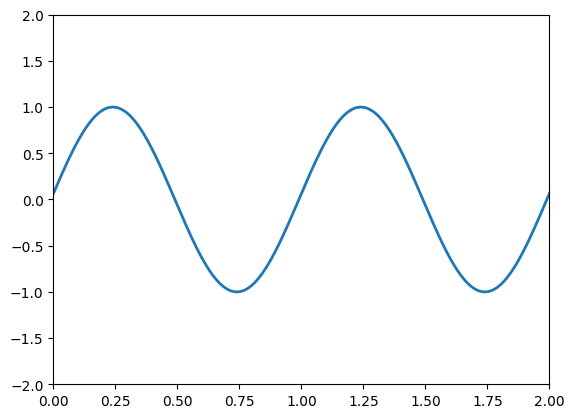

In [112]:
## przykład tworzenia animacji z użyciem matplotlib.animation
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation, rc


def animate():
    # przygotuj wykres do rysowania animacji
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # funkcja animacji, wywoływana sekwencyjnie
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # funkcja inicjalizacji, rysująca tło każdej klatki
    def init():
        line.set_data([], [])
        return (line,)
    
    # wywołanie animacji; blit=True  powoduje rysowanie tylko zmian
    anim = animation.FuncAnimation(
        fig, sin, init_func=init, frames=100, interval=20, blit=True
    )
    
    return anim.to_jshtml()

HTML(animate())


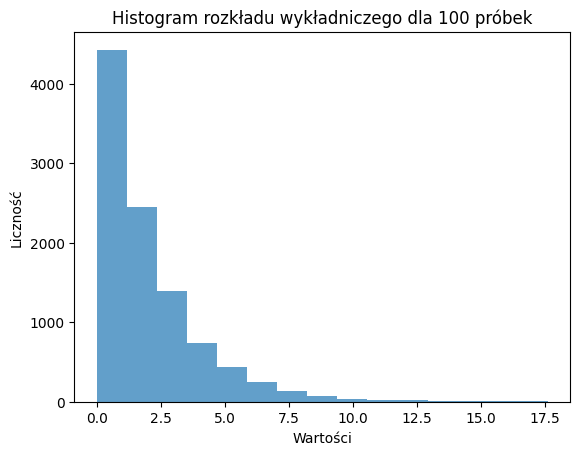

In [113]:
def animate_distribution():
    # przygotuj wykres do rysowania animacji
    fig, ax = plt.subplots()
    
    # lista zapisująca wszystkie obserwacje
    sample_list = []
    # generowanie próbki o liczności 100 z rozkładu wykładzniczego o parametrze 1/lambda=0.5
    # tworzenie histogramu z uwzględnieniem poprzednich próbek
    def exp(i):
        rate = 0.5
        samples = [pyro.sample("sample", dist.Exponential(rate)) for _ in range(100)]
        sample_list.extend(samples)
        # Aktualizacja histogramu
        ax.clear()
        ax.hist(sample_list, bins=15, density=False, alpha=0.7)
        ax.set_title(f'Histogram rozkładu wykładniczego dla {i+1} próbek')
        ax.set_xlabel('Wartości')
        ax.set_ylabel('Liczność')
        return ax

    # funkcja inicjalizacji, rysująca tło każdej klatki
    def init():
        n, bins, patches = ax.hist([], bins=15, density=False, alpha=0.7)
        return patches
    
    # wywołanie animacji; blit=True  powoduje rysowanie tylko zmian
    anim = animation.FuncAnimation(
        fig, exp, init_func=init, frames=100, interval=20
    )
    
    return anim.to_jshtml()

HTML(animate_distribution())

Tak jak wspomniano wcześniej, w Pyro funkcje stochastyczne mogą zawierać zarówno odwołania do podstawowych funkcji stochastycznych `pyro.distributions`, jak i deterministyczny kod pythonowy, co pozwala na modelowanie różnych doświadczeń losowych. Przykładowo, w poniższej komórce znajduje się model doświadczenia losowego, przedstawionego na początku notatnika.


In [114]:
# doświadczenie losowe: wylosuj pudełko, a następnie z niego wylosuj owoc
def get_fruit(box_proba=0.45, red_box_proba=0.4, blue_box_proba=0.7):
    boxes = ["r", "b"]
    fruit = ["a", "o"]
    box_idx = pyro.sample("box", dist.Bernoulli(box_proba))
    if box_idx == 0:
        fruit_idx = pyro.sample("fruit", dist.Bernoulli(red_box_proba))
    else:
        fruit_idx = pyro.sample("fruit", dist.Bernoulli(blue_box_proba))
    return boxes[int(box_idx)], fruit[int(fruit_idx)]


for _ in range(5):
    box, fruit = get_fruit()
    print(f"Wylosowano '{fruit}' z pudełka '{box}'")


Wylosowano 'a' z pudełka 'r'
Wylosowano 'a' z pudełka 'b'
Wylosowano 'a' z pudełka 'b'
Wylosowano 'a' z pudełka 'r'
Wylosowano 'o' z pudełka 'b'


Dzięki temu możliwe jest stworzenie symulatora, który powtórzy doświadczenie dostatecznie dużą liczbę razy w celu numerycznego przybliżenia prawdopodobieństw, które wcześniej wyznaczyliśmy obliczając je ręcznie.


In [115]:
# powtórz doświadczenie dużą liczbę razy i aproksymuj prawdopodobieństwa
total = 10_000
n_boxes = {"r": 0, "b": 0}
n_fruit = {"a": 0, "o": 0}
for _ in range(total):
    box, fruit = get_fruit()
    n_boxes[box] += 1
    n_fruit[fruit] += 1


display(Math(f"$$\Pr(B=r)\simeq{n_boxes['r'] / total:.3f}$$"))
display(Math(f"$$\Pr(B=b)\simeq{n_boxes['b'] / total:.3f}$$"))
display(Math(f"$$\Pr(F=a)\simeq{n_fruit['a'] / total:.3f}$$"))
display(Math(f"$$\Pr(F=o)\simeq{n_fruit['o'] / total:.3f}$$"))
print("itd.")
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

itd.


### Zadanie 1.6 (1,5 p.)

Rozważmy doświadczenie losowe: student aplikował na 9 kierunków. Szanse przyjęcia dla każdego z kierunków są równe i wynoszą 1%. Niestety, student nie został przyjęty na żaden z kierunków. Jakie jest prawdopodobieństwo takiej sytuacji? Wybierz odpowiedni rozkład prawdopodobieństwa i oblicz prawdopodobieństwo ręcznie, wpisując tok rozumowania do następnej komórki oraz przypisując wynik do zmiennej `p_reject`. Zamodeluj doświadczenie w formie symulatora uzupełniając funkcję `attempt_join_university`, która wykona doświadczenie losowe, oraz funkcję `simulate_join_university`, która wykona to doświadczenie zadaną liczbę razy i zwróci prawdopodobieństwo opisywanego zdarzenia.


Wykorzystamy rozkład dwumianowy, gdzie za sukces uznamy przyjęcie na dowolny kierunek. Rozkład oznaczymy jako $ \mathrm{B}(n, p) $, gdzie $n$ będzie liczbą prób, a $p$ prawdopodobieństwem sukcesu. Funkcję rozkładu prawdopodbieństwa dla takiego rozkładu zapisujemy jako
$$ P(X=k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}.$$
Wówczas znając liczbę prób dostania się na kierunek: $n=9$ oraz prawdopodobieństwo przyjęcia na każdy z osobna: $p=0.01$ mozemy wyznaczyć prawdopodobieństwo niedostania się na żaden z 9 kierunków.
$$ P(X=0) = \binom{9}{0} \cdot 0.01^0 \cdot (1-0.01)^{9-0} = \frac{9!}{1 \cdot 9!} \cdot 1 \cdot 0.99^9 = 0.99^9$$

In [116]:
p_reject = 0.99**9

#raise NotImplementedError()


In [117]:
display(Math(f"$$\Pr(reject)={p_reject:.5f}$$"))

# testy ukryte


<IPython.core.display.Math object>

In [118]:
def attempt_join_university(n_trials=9, p_admission=0.01):
    """Funkcja stochastyczna modelująca doświadczenie losowe."""
    samples = [pyro.sample("sample", dist.Bernoulli(probs = p_admission)) for _ in range(n_trials)]
    return sum(samples)
    #raise NotImplementedError()

    
def simulate_join_university(n_simulations=10_000):
    """Wykonaj doświadczenie losowe określoną liczbę.
    Zwraca przybliżone prawdopodobieństwo nie przyjęcia na żaden z kierunków
    przy zadanej liczbie prób.
    """
    counter = 0
    for _ in range(n_simulations):
        if attempt_join_university() == 0:
            counter += 1
    probability = counter / n_simulations
    return probability
    #raise NotImplementedError()


In [119]:
display(Math(f"$$\Pr(reject)\simeq{simulate_join_university():.5f}$$"))

# testy ukryte


<IPython.core.display.Math object>

### Zadanie 1.7 (1,5 p.)

Przygotuj symulator dla zadania 1.4. Sprawdź, jak czułość i swoistość testu oraz prawdopodobieństwo choroby wpływają na osiągany wynik. Wykonaj wizualizację zależności prawdopodobieństwa bycia chorym przy pozytywnym wyniku testu od ww. parametrów.


Test diagnostyczny dotyczący pewnej choroby ma następujące parametry:

* jeżeli pacjent jest chory ($Y=1$), to prawdopodobieństwo, że test diagnostyczny dał wynik pozytywny ($X=1$) wynosi $0.9$ (*czułość testu* - stosunek wyników prawdziwie dodatnich do sumy prawdziwie dodatnich i fałszywie ujemnych)
* prawdopodobieństwo że osoba jest chora na tę chorobę ($Y=1$) wynosi $0.014$
* jeżeli pacjent nie jest chory ($Y=0$), to prawdopodobieństwo, że test dał wynik negatywny ($X=0$) wynosi $0.97$ (*swoistość testu* - stosunek wyników prawdziwie ujemnych od sumy prawdziwie ujemnych i fałszywie dodatnich)

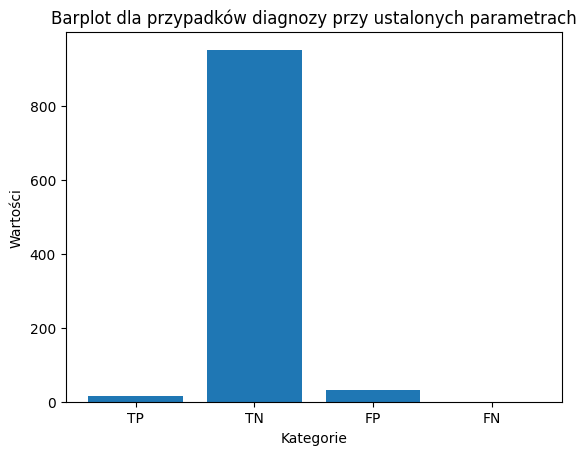

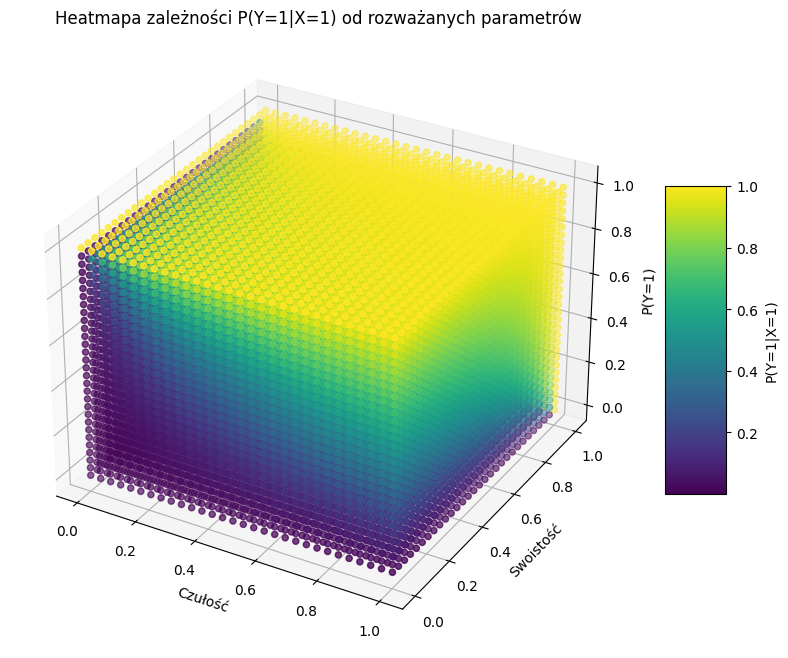

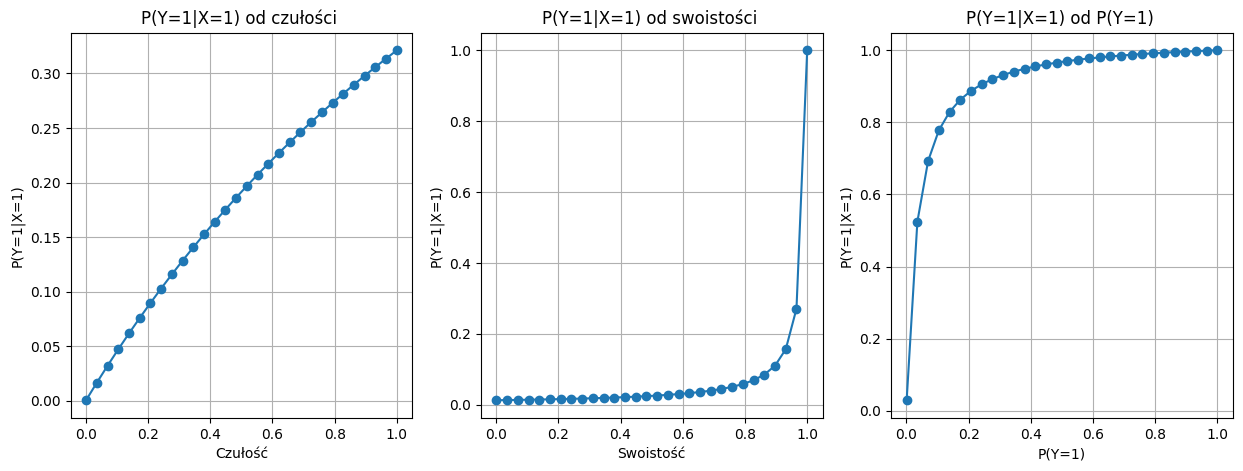

In [120]:
def diagnose_test(sensitivity, specificity, probability):
    """Funkcja stochastyczna modelująca doświadczenie losowe."""
    disease_result = pyro.sample("disease", dist.Bernoulli(probs = probability))
    if disease_result == 1:
        test_result = pyro.sample("test", dist.Bernoulli(probs = sensitivity))
    else:
        test_result = pyro.sample("test", dist.Bernoulli(probs = 1-specificity))

    return disease_result, test_result


def simulate_diagnose_test(sensitivity, specificity, probability, n_simulations):
    """Wykonanie doświadczenia losowego określoną liczbę razy."""
    results = []
    for _ in range(n_simulations):
        results.append(diagnose_test(sensitivity, specificity, probability))
    return results
    

def changes_impact(sensitivity, specificity, probability, n_simulations):
    """Wykres słupkowy do badania wpływu argumentów na wynik (przypadki TP, TN, FP, FN)."""
    simulated = simulate_diagnose_test(sensitivity, specificity, probability, n_simulations)

    true_positive_results = sum(1 for i,j in simulated if i==1 and j==1)
    true_negative_results = sum(1 for i,j in simulated if i==0 and j==0)
    false_positive_results = sum(1 for i,j in simulated if i==0 and j==1)
    false_negative_results = sum(1 for i,j in simulated if i==1 and j==0)
    categories = ['TP','TN','FP','FN']
    values = [true_positive_results, true_negative_results, false_positive_results, false_negative_results]

    plt.bar(categories, values)
    plt.title('Barplot dla przypadków diagnozy przy ustalonych parametrach')
    plt.xlabel('Kategorie')
    plt.ylabel('Wartości')
    plt.show()


def disease_prob_with_p_test(sensitivity, specificity, probability):
    """Wyznaczenie P(Y=1|X=1)."""
    return (sensitivity*probability) / (((1 - specificity) * (1 - probability)) + (sensitivity * probability))


def visualization_of_disease_prob_with_p_test():
    """Wykres 3d zależności prawdopodobieństwa od parametrów testu."""
    sens_values = np.linspace(0.001, 1, 30)
    spec_values = np.linspace(0.001, 1, 30)
    prob_values = np.linspace(0.001, 1, 30)

    sensitivity, specificity, probability = np.meshgrid(sens_values, spec_values, prob_values, indexing='ij')

    prob = disease_prob_with_p_test(sensitivity, specificity, probability)

    # Konwersja wartości P(Y=1|X=1) do kolorów
    colors = prob.ravel()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(sensitivity.ravel(), specificity.ravel(), probability.ravel(), c=colors, cmap='viridis')
    ax.set_xlabel('Czułość')
    ax.set_ylabel('Swoistość')
    ax.set_zlabel('P(Y=1)')
    ax.set_title('Heatmapa zależności P(Y=1|X=1) od rozważanych parametrów')

    cbar = fig.colorbar(sc, shrink=0.5, aspect=5)
    cbar.set_label('P(Y=1|X=1)')
    plt.show()


def depencencies_visualization(sensitivity, specificity, probability):
    """3 wykresy zależności P(Y=1|X=1) od parametrów."""
    sens_values = np.linspace(0.001, 1, 30)
    spec_values = np.linspace(0.001, 1, 30)
    prob_values = np.linspace(0.001, 1, 30)

    by_sens = disease_prob_with_p_test(sens_values, specificity, probability)
    by_spec = disease_prob_with_p_test(sensitivity, spec_values, probability)
    by_prob = disease_prob_with_p_test(sensitivity, specificity, prob_values)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].plot(sens_values, by_sens, marker='o')
    axs[0].set_xlabel('Czułość')
    axs[0].set_ylabel('P(Y=1|X=1)')
    axs[0].set_title('P(Y=1|X=1) od czułości ')
    axs[0].grid(True)

    axs[1].plot(spec_values, by_spec, marker='o')
    axs[1].set_xlabel('Swoistość')
    axs[1].set_ylabel('P(Y=1|X=1)')
    axs[1].set_title('P(Y=1|X=1) od swoistości ')
    axs[1].grid(True)

    axs[2].plot(prob_values, by_prob, marker='o')
    axs[2].set_xlabel('P(Y=1)')
    axs[2].set_ylabel('P(Y=1|X=1)')
    axs[2].set_title('P(Y=1|X=1) od P(Y=1) ')
    axs[2].grid(True)
    plt.show()

#diagnose_test(0.9, 0.97, 0.014)
#print(simulate_diagnose_test(0.9, 0.97, 0.014, 1000))
changes_impact(0.9, 0.97, 0.014, 1000)
visualization_of_disease_prob_with_p_test()
depencencies_visualization(0.9, 0.97, 0.014)
    